<a href="https://colab.research.google.com/github/PedroConst/EQE-358-Metodos-Numericos/blob/main/Codigos/EDO_Problema_Valor_Inicial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de Euler Explícito (*Forward*)

$\frac{dy}{dt}=f(y,t)$

$y_{i+1}=y_{i}+hf(y_{i},t_{i})$

Este código implementa o método de Euler explícito para resolver um problema de valor inicial (IVP) de uma equação diferencial ordinária (EDO) de primeira ordem do tipo dy/dx = f(x, y). Ele realiza uma série de passos de integração de acordo com os valores iniciais (x0, y0), o número de passos (n) e o tamanho do passo (h) especificados.

O código também controla quando salvar os valores de x e y calculados em arrays de saída (`xout` e `yout`) com base no parâmetro `i_out`. No final, ele retorna esses arrays contendo os valores de x e y calculados ao longo do processo. Certifique-se de definir a função `getf(x, y)` em seu código para representar a função f(x, y) no contexto do problema específico que você está resolvendo.

In [1]:
import numpy as np

def metodo_euler_explicito(x0, y0, n, h):
    # x0 = valor inicial para x
    # y0 = valor inicial para y
    # n = número de passos
    # h = tamanho do passo
    # Requer a função getf(y,x)

    # Inicializa o contador e os vetores de saída para x e y
    k = 0
    x = np.zeros(n)
    y = np.zeros(n)

    # Inicializa x e y com os valores iniciais
    x[0] = x0
    y[0] = y0

    # Loop principal para realizar os cálculos
    for i in range(0, n-1):

        y[i+1] = y[i] + h * getf(x[i], y[i]) # Atualiza o valor de y usando o método de Euler explícito
        x[i+1] = x[i] + h                    # Incrementa o valor de x

    # Retorna os vetores de saída com os valores de x e y calculados
    return x, y

# A função getf(x, y) deve ser definida em algum lugar do seu código.
# Ela representa a função f(x, y) no contexto do problema do valor inicial.



---


**Exemplo:** Resolva a EDO $\frac{dy}{dt}=t^2\sqrt{y}$ com condição inicial $y(0)=1$ usando o Método de Euler Explícito.


---



Text(0, 0.5, 'y(t)')

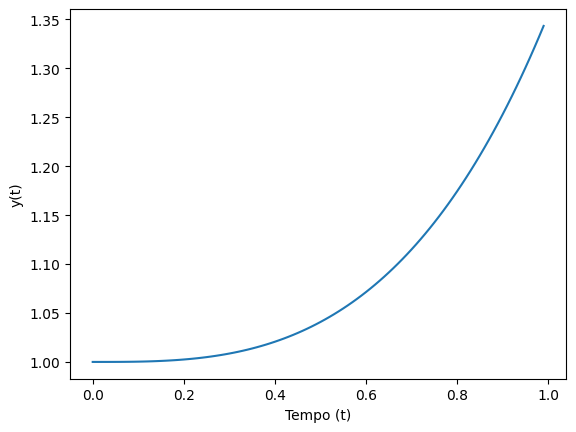

In [20]:
import matplotlib.pyplot as plt

# Definir a função f(y,t)
def getf(t,y):
    f = (t**2)*(y**0.5)
    return f

t0 = 0      # Escolher o instante inicial
y0 = 1      # Definir a condição inicial
n = 100     # Definir o número de passos
h = 0.01    # Escolher um passo de integração

# Chamar a função do Método de Euler Explícito
t, yexp = metodo_euler_explicito(t0, y0, n, h)

# Plotar os resultados
plt.plot(t,yexp)
plt.xlabel('Tempo (t)')
plt.ylabel('y(t)')

# Método de Euler Implícito (*Backward*)

$\frac{dy}{dt}=f(y,t)$

$y_{i+1}=y_{i}+hf(y_{i+1},t_{i+1})$

Definir um residual

$R = y_{i+1}-y_{i}-hf(y_{i+1},t_{i+1}) $

Definir a derivada do Residual para usar o Método de Newton

$R' = 1-hf'(y_{i+1},t_{i+1}) $


In [8]:
import numpy as np

def ivp_implicit_euler(x0, y0, n, h):
    # x0 = valor inicial para x
    # y0 = valor inicial para y
    # n = número de passos a serem dados
    # h = tamanho do passo
    # Requer a função getR(y,x) e getdR(y,x)

    # Inicializar os vetores de saída para x e y
    x = np.zeros(n)
    y = np.zeros(n)

    # Definir condição iniciais do PVI e tolerância
    x[0] = x0
    y[0] = y0
    tol = 1e-8

    for i in range(0,n-1):

        # Inicializar contador e chute inicial para y[i+1] (Método de Continuação de Ordem Zero)
        k = 0
        y[i+1] = y[i]
        x[i+1] = x[i] + h

        # Calcular f e df do Método de Euler Implícito no chute inicial de y[i+1]
        R = y[i+1]-y[i]-h*getf(x[i+1], y[i+1])
        dR = 1-h*getdf(x[i+1], y[i+1])

        # Fazer iterações de Newton até convergir y[i+1]
        while abs(R) > tol:
            # Atualizar y[i+1] pelo Método de Newton
            y[i+1] = y[i+1] - R / dR

            # Atualizar o contador de Newton e os valores de f e df
            k = k + 1
            R = y[i+1] - y[i] - h*getf(x[i+1], y[i+1])
            dR = 1.0 - h*getdf(x[i+1], y[i+1])

    return x, y

# A função getf(x,y) deve ser definida em algum lugar do seu código.
# Ela representa a função f(x,y) no contexto do problema do valor inicial.

# A função getdf(y,x) deve ser definida em algum lugar do seu código.
# Ela representa a derivada de f(x,y) em relação a y, necessária para o método de Euler implícito.


---


**Exemplo:** Resolva a EDO $\frac{dy}{dt}=t^2\sqrt{y}$ com condição inicial $y(0)=1$ usando o Método de Euler Implícito.


---

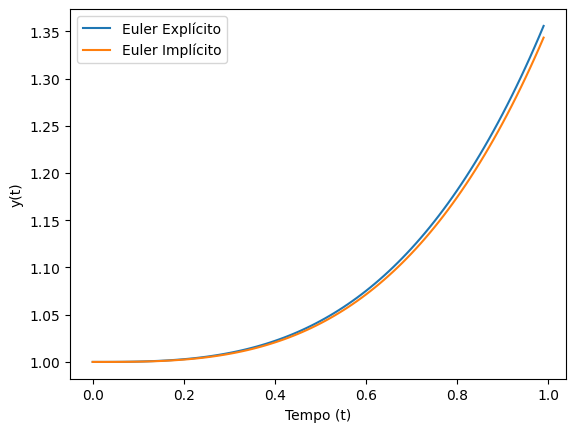

In [14]:
import matplotlib.pyplot as plt

# Definir a função f(y,t)
def getf(t,y):
    f = (t**2)*(y**0.5)
    return f

# Definir a derivada de f(y,t)
def getdf(t,y):
    df = 0.5*(t**2)*(y**(-0.5))
    return df

t0 = 0      # Escolher o instante inicial
y0 = 1      # Definir a condição inicial
n = 100     # Definir o número de passos
h = 0.01    # Escolher um passo de integração

# Chamar a função do Método de Euler Implícito
t, yimp = ivp_implicit_euler(t0, y0, n, h)

# Plotar os resultados
plt.plot(t,yimp)
plt.plot(t,yexp)
plt.xlabel('Tempo (t)')
plt.ylabel('y(t)')
plt.legend(['Euler Explícito','Euler Implícito'])